# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [257]:
import pandas as pd

In [258]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [259]:
df = pd.read_csv('../../datasets/data/checker_submits.csv', parse_dates=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.head()

,uid,labname,numTrials,timestamp,hour,dayofweek
0,user_4,project1,1,2020-04-17 05:19:02.744528,5,4
1,user_4,project1,2,2020-04-17 05:22:45.549397,5,4
2,user_4,project1,3,2020-04-17 05:34:24.422370,5,4
3,user_4,project1,4,2020-04-17 05:43:27.773992,5,4
4,user_4,project1,5,2020-04-17 05:46:32.275104,5,4


In [260]:
df_processed = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']].copy()

X = df_processed[['uid', 'labname', 'numTrials', 'hour']]
y = df_processed['dayofweek']

onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [261]:
categorical_features = ['uid', 'labname']
encoded_features = onehotencoder.fit_transform(X[categorical_features])

encoded_feature_names = onehotencoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names, index=X.index)
df_encoded.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [262]:
X_processed = X.drop(columns=categorical_features)
X_processed = pd.concat([X_processed, df_encoded], axis=1)

In [263]:
continuous_features = ['numTrials', 'hour']
scaler = StandardScaler()
X_processed[continuous_features] = scaler.fit_transform(X_processed[continuous_features])

In [264]:
df_final = pd.concat([X_processed, y], axis=1)
#df_final.to_csv('dayofweek.csv', index=False)
df_final.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4


In [265]:
print(f'accuracy = {accuracy_score([df['dayofweek'].mode()] * len(df), df['dayofweek'])}')

accuracy = 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [266]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [267]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X_processed, y)

prediction = model.predict(X_processed)
print(f'accuracy {accuracy_score(y, prediction)}')

accuracy 0.6405693950177936


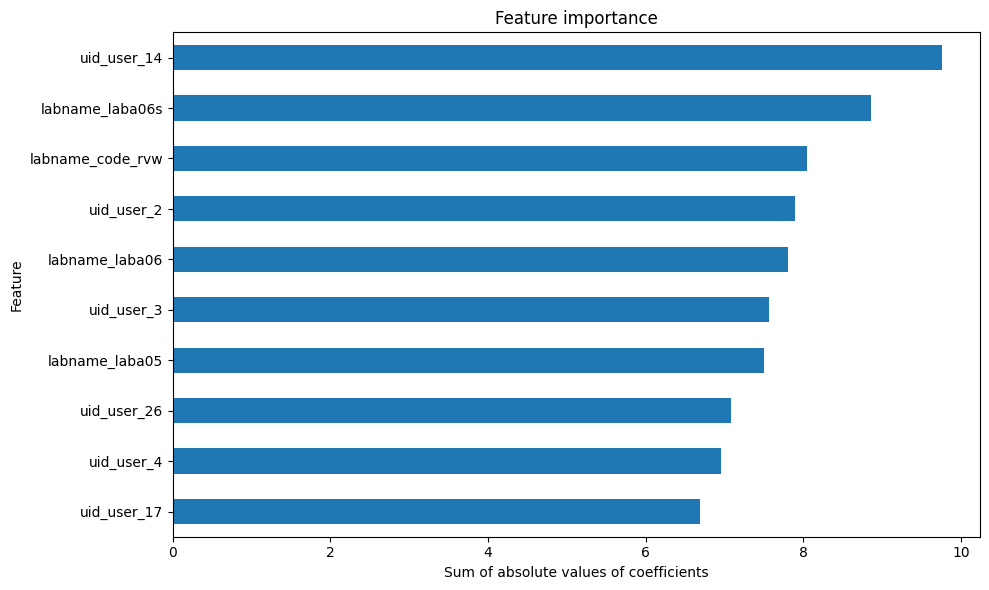

In [268]:
def plot_feature_importance(importance_values, feature_names, top_n, title):
    calculated_importance = None

    if isinstance(importance_values, list) and all(hasattr(est, 'coef_') for est in importance_values):
        all_coefs = np.array([est.coef_[0] if est.coef_.ndim == 2 else est.coef_ for est in importance_values])
        calculated_importance = np.sum(np.abs(all_coefs), axis=0)
        xlabel_text = 'Sum of absolute values of coefficients'
    elif isinstance(importance_values, np.ndarray):
        if importance_values.ndim > 1:
            calculated_importance = np.sum(np.abs(importance_values), axis=0)
            xlabel_text = 'Sum of absolute values of coefficients'
        else:
            calculated_importance = np.abs(importance_values)
            if np.all(importance_values >= 0) and np.isclose(np.sum(importance_values), 1.0):
                xlabel_text = 'relative importance'
            else:
                xlabel_text = 'absolute importance'
    else:
        raise TypeError("Ошибка йоу")

    importance_series = pd.Series(calculated_importance, index=feature_names)

    top_features = importance_series.nlargest(top_n)

    plt.figure(figsize=(10, 6))
    top_features.sort_values().plot(kind='barh')
    plt.title(title)
    plt.xlabel(xlabel_text)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


plot_feature_importance(model.coef_, X_processed.columns, top_n=10, title='Feature importance')

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [269]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [270]:
updated_model = SVC(kernel='poly', probability=True, random_state=21)
updated_model.fit(X_processed, y)
print(f'accuracy {accuracy_score(y, updated_model.predict(X_processed))}')

accuracy 0.8594306049822064


accuracy 0.6115065243179122


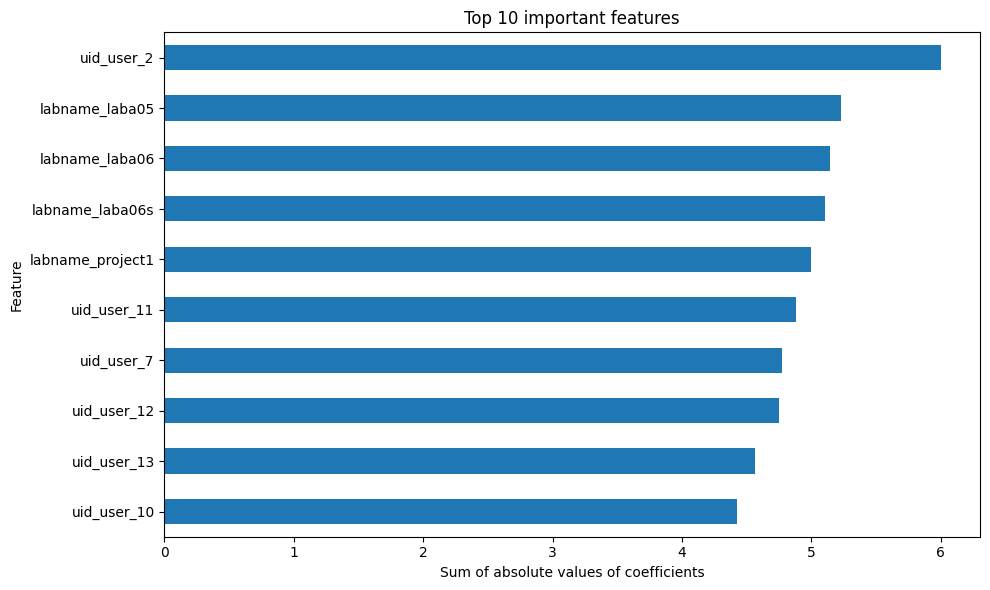

In [271]:
updated_model_linear = SVC(kernel='linear', probability=True, random_state=21)
updated_model_linear_ovr = OneVsRestClassifier(updated_model_linear)
updated_model_linear_ovr.fit(X_processed, y)
print(f'accuracy {accuracy_score(y, updated_model_linear_ovr.predict(X_processed))}')
plot_feature_importance(updated_model_linear_ovr.estimators_, X_processed.columns, top_n=10, title='Top 10 important features')

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [272]:
from sklearn.tree import DecisionTreeClassifier

In [273]:
print("Max depth, accuracy:")
for i in range(1,29):
    tree_model_test = DecisionTreeClassifier(max_depth=i)
    tree_model_test.fit(X_processed, y)
    print(i, accuracy_score(y, tree_model_test.predict(X_processed)))

Max depth, accuracy:
1 0.35765124555160144
2 0.4389086595492289
3 0.48991696322657174
4 0.5516014234875445
5 0.6109134045077106
6 0.6637010676156584
7 0.7064056939501779
8 0.7502965599051008
9 0.7846975088967971
10 0.8196915776986952
11 0.8499406880189798
12 0.8831553973902728
13 0.9104389086595492
14 0.9311981020166074
15 0.9460260972716489
16 0.9608540925266904
17 0.9709371293001187
18 0.9798339264531435
19 0.9839857651245552
20 0.9869513641755635
21 0.9905100830367735
22 0.9922894424673784
23 0.9928825622775801
24 0.9958481613285883
25 0.9958481613285883
26 0.9988137603795967
27 0.9988137603795967
28 1.0


In [274]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=21)
tree_model.fit(X_processed, y)
print(f'accuracy {accuracy_score(y, tree_model.predict(X_processed))}')

accuracy 0.5516014234875445


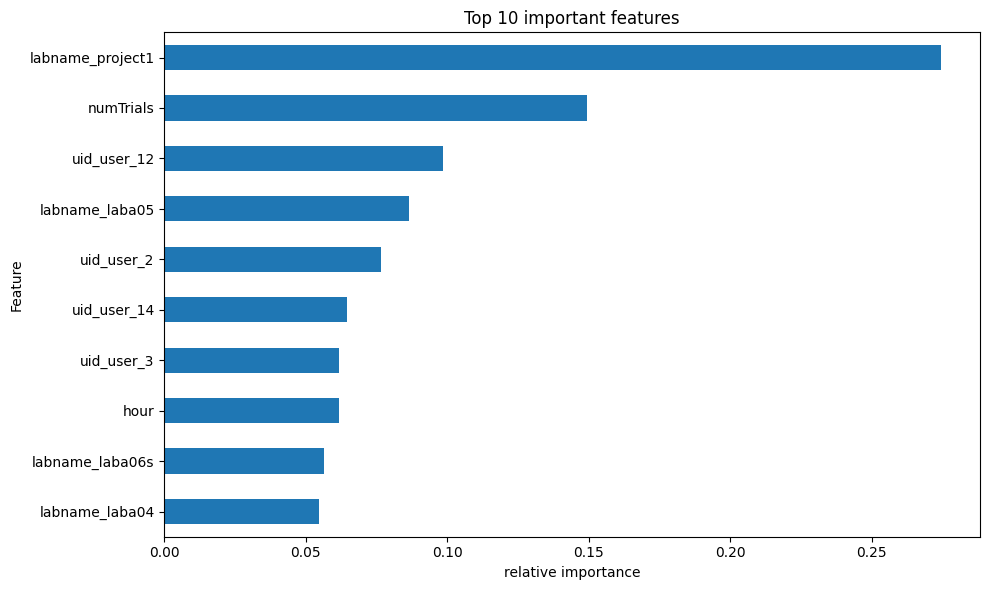

In [275]:
plot_feature_importance(tree_model.feature_importances_, X_processed.columns, top_n=10, title='Top 10 important features')

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [276]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
max_accuracy = 0
for i in range(1,120):
    for j in range(1,30):
        forest_model_test = RandomForestClassifier(n_estimators=i, max_depth=j)
        forest_model_test.fit(X_processed, y)
        print(f'n_estimators = {i} max_depth = {j} accuracy = {accuracy_score(y, forest_model_test.predict(X_processed))}')
        max_accuracy = max(max_accuracy, accuracy_score(y, forest_model_test.predict(X_processed)))
        if accuracy_score(y, forest_model_test.predict(X_processed)) == max_accuracy:
            best_n_estimators = i
            best_max_depth = j
print(f'Best params: n_estimators = {best_n_estimators} max_depth = {best_max_depth} accuracy = {max_accuracy}')

n_estimators = 1 max_depth = 1 accuracy = 0.2586002372479241
n_estimators = 1 max_depth = 2 accuracy = 0.4068801897983393
n_estimators = 1 max_depth = 3 accuracy = 0.3540925266903915
n_estimators = 1 max_depth = 4 accuracy = 0.3428232502965599
n_estimators = 1 max_depth = 5 accuracy = 0.4697508896797153
n_estimators = 1 max_depth = 6 accuracy = 0.43831553973902726
n_estimators = 1 max_depth = 7 accuracy = 0.4851720047449585
n_estimators = 1 max_depth = 8 accuracy = 0.5782918149466192
n_estimators = 1 max_depth = 9 accuracy = 0.6014234875444839
n_estimators = 1 max_depth = 10 accuracy = 0.6091340450771056
n_estimators = 1 max_depth = 11 accuracy = 0.6441281138790036
n_estimators = 1 max_depth = 12 accuracy = 0.7467378410438908
n_estimators = 1 max_depth = 13 accuracy = 0.7603795966785291
n_estimators = 1 max_depth = 14 accuracy = 0.7870699881376038
n_estimators = 1 max_depth = 15 accuracy = 0.8457888493475683
n_estimators = 1 max_depth = 16 accuracy = 0.8196915776986952
n_estimators = 1

In [278]:
forest_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
forest_model.fit(X_processed, y)
print(f'Accuracy = {accuracy_score(y, forest_model.predict(X_processed))}')

Accuracy = 1.0


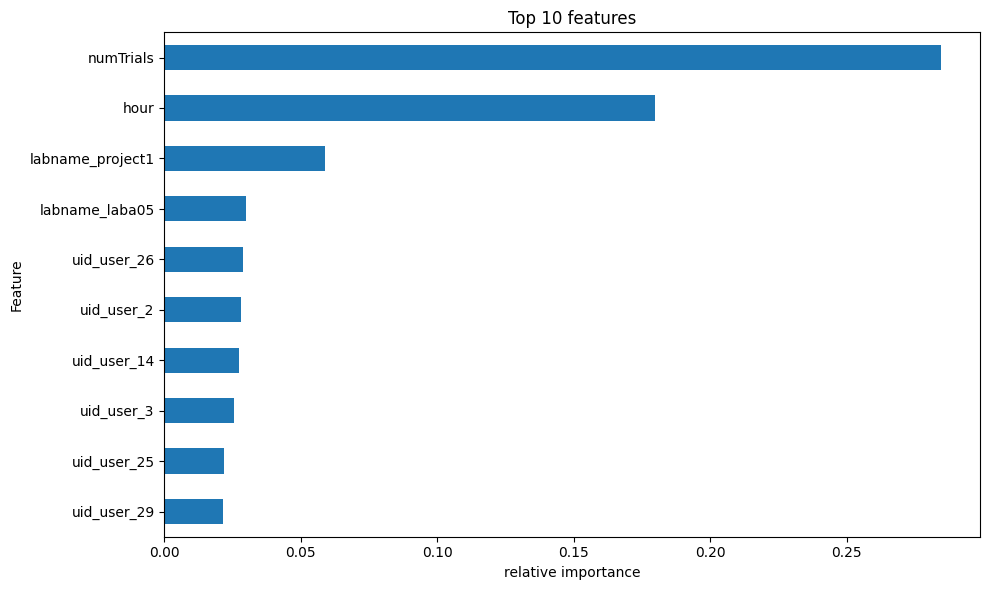

In [279]:
plot_feature_importance(forest_model.feature_importances_, X_processed.columns, top_n=10, title='Top 10 features')